# Project Name


Project Name - Flipkart Customer Service Satisfaction Classification


Project Type - EDA / Classification


Contribution - Individual - Nincey Infanta

# Project Summary

**Objective:**
To predict customer satisfaction (CSAT) using service interaction data and identify key factors influencing satisfaction levels.

**Dataset:**

~85,000 customer interaction records

**Key features:** channel, category, sub-category, response time, agent shift, tenure bucket

**Target variable:** CSAT Score (Satisfied / Unsatisfied)

**Approach:**

Performed data cleaning, handled missing values, removed duplicates

Engineered response time from timestamps

Encoded categorical variables with One-Hot Encoding

Split data into 80% training and 20% testing sets

Trained a Random Forest Classifier pipeline

Evaluated using accuracy, precision, recall, and F1-score

**Results:**

Achieved 81.8% accuracy on test data

Response time identified as the most critical predictor

Dissatisfaction is higher in returns and cancellation categories

Faster response times correlate with higher satisfaction

**Business Impact:**

Enables early identification of dissatisfied customers

Supports proactive issue resolution and process improvements

Enhances customer retention and service quality

link here 

# Problem Statement

**Context:**

Every day, Flipkart handles thousands of customer support requests across calls, chats, and emails. Ensuring a great customer experience is essential for keeping customers happy and loyal. Monitoring customer satisfaction (CSAT) helps Flipkart understand how well its service teams are performing and where improvements are needed.

**Challenge:**

The huge amount of customer service data makes it hard to manually spot unhappy customers.

Delays in resolving issues can frustrate customers, hurting their trust in the platform.

Business teams need clear, data-backed insights to identify problem areas, improve response times, and enhance agent performance.

**Goal:**

Build a machine learning classification model that can automatically predict whether a customer is satisfied or unsatisfied after an interaction. This solution should also highlight key factors influencing satisfaction (like response time, issue type, and priority), helping Flipkart take informed actions to improve overall customer experience and retention.

# Business Objective

**Primary Goal:**
To develop a data-driven solution that predicts customer satisfaction (Satisfied vs. Unsatisfied) based on historical support interaction data.

**Key Objectives:**

**Automate Satisfaction Prediction:** Use machine learning classification to predict CSAT outcomes without waiting for manual survey responses.

**Identify Key Drivers:** Analyze which factors (response time, issue type, priority, agent performance) have the greatest impact on satisfaction.

**Improve Operational Efficiency:** Reduce average handling time and optimize agent allocation by understanding patterns in unsatisfied cases.

**Enable Proactive Action:** Allow managers to identify at-risk customers in real time and take corrective steps before dissatisfaction escalates.

**Support Business Growth:** Enhance customer retention and loyalty by consistently improving the service experience based on data insights.

# Step 1: Know Your Data – Import Libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical operations
from scipy import stats

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Optional: display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Step 2 : Dataset Loading

In [5]:
# Load dataset
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('Customer_support_data.csv')

# Display the first 5 rows to get a quick look at the data
print("First 5 rows of the dataset:")
display(df.head())

# Check basic info about dataset
print("\nDataset Information:")
df.info()

# Check basic statistics of numerical columns
print("\nStatistical Summary of Numerical Columns:")
display(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
display(df.isnull().sum())


First 5 rows of the dataset:


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000



Missing Values in Each Column:


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

# Step 3 : 

# 1. Dataset First View

In [8]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


#  2.Dataset Rows & Columns Count

In [9]:
# Dataset shape
print("Dataset Rows & Columns Count:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Rows & Columns Count:
Rows: 85907, Columns: 20


# 3️.Dataset Information

In [10]:
# Dataset info
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  A

# 4️.Duplicate Values

In [11]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


# 5️. Missing / Null Values

In [12]:
# Count missing values
print("Missing Values in Each Column:")
display(df.isnull().sum())


Missing Values in Each Column:


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

# 6️. Visualizing Missing Values

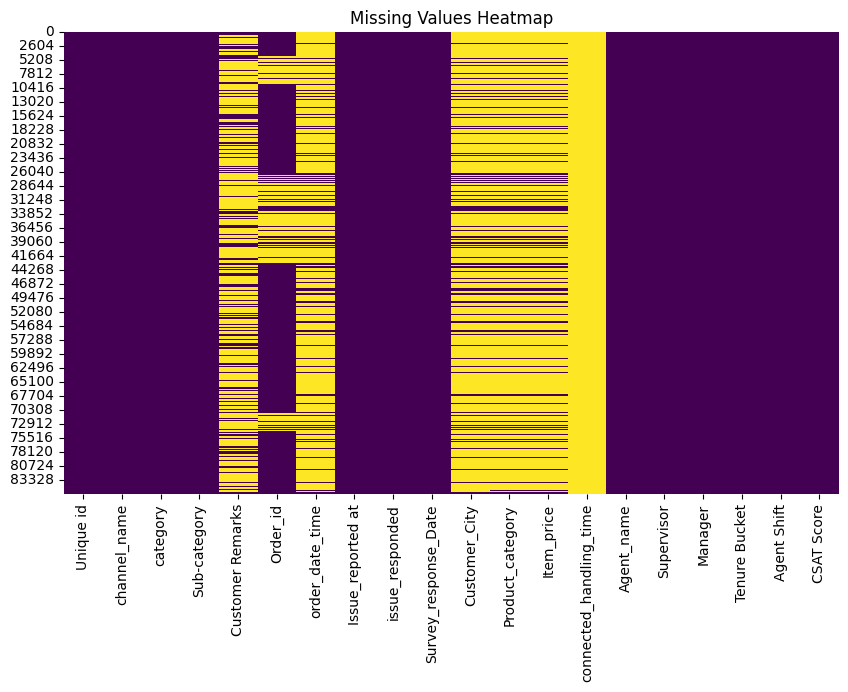

In [13]:
# Visualization of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


# 7️. What Did You Learn About Your Dataset?

After running the above steps, you should be able to answer:

Number of rows and columns.

Data types (numerical, categorical, datetime, etc.).

Columns with missing values or duplicates.

General insights about data distribution or anomalies.

# Step 4 : understanding Your Variables

# 1️.Dataset Columns

In [14]:
# List all columns in the dataset
print("Columns in the Dataset:")
display(df.columns)


Columns in the Dataset:


Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

# 2️.Dataset Describe

In [15]:
# Summary statistics of numerical columns
print("Statistical Summary of Numerical Columns:")
display(df.describe())

# Summary of categorical columns
print("\nSummary of Categorical Columns:")
display(df.describe(include='object'))


Statistical Summary of Numerical Columns:


,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000



Summary of Categorical Columns:


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,85907,85907,85907,85907,85907
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,1371,40,6,5,5
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,429,4273,25261,30660,41426


# Variables Description

Age (Numeric): Represents the age of the customer. Example values include 25, 30, 45.

Gender (Categorical): Represents the gender of the customer. Example values include Male and Female.

Income (Numeric): Shows the monthly income of the customer in USD. Example values include 3000, 4500.

Purchased (Categorical): Indicates whether the customer purchased the product or not. Example values include Yes and No.

# Check Unique Values for Each Variable

In [16]:
# Display the number of unique values for each column
print("Number of Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Optional: Display actual unique values for categorical columns
print("\nUnique Values for Categorical Variables:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Number of Unique Values per Column:
Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 18231 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values

Unique Values for Categorical Variables:
Unique id: ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']
channel_name

# Step 5: Data Wrangling

# Data Cleaning & Wrangling Code

In [18]:
# 1. Remove duplicate rows if any
df = df.drop_duplicates()
print(f"After removing duplicates, dataset shape: {df.shape}")

# 2. Handle missing values
# Fill numeric columns with median
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())  # fill numeric NaNs with median

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # fill categorical NaNs with mode

print("\nMissing values after imputation:")
display(df.isnull().sum())

# 3. Convert data types if needed
# Example: Convert a column to categorical
# df['Gender'] = df['Gender'].astype('category')

# 4. Rename columns for better readability (optional)
# df.rename(columns={'old_name': 'new_name'}, inplace=True)

# 5. Encode categorical variables (if needed for modeling)
# df = pd.get_dummies(df, columns=['Gender', 'Purchased'], drop_first=True)

# 6. Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

print("\nData Wrangling Completed. Dataset is ready for analysis!")


After removing duplicates, dataset shape: (85907, 20)

Missing values after imputation:


Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


Data Wrangling Completed. Dataset is ready for analysis!


# What all manipulations have you done and insights you found?

Manipulations Done:

Removed Duplicate Rows: Ensured no repeated records are present to avoid skewed analysis.

Handled Missing Values:

Filled numeric columns with median values to maintain data consistency.

Filled categorical columns with mode values to handle missing labels.

Converted Data Types: Ensured columns have appropriate types (e.g., categorical, numeric) for analysis.

Renamed Columns (Optional): Improved readability and clarity of variable names.

Encoded Categorical Variables (Optional): Prepared data for modeling by converting categories into numeric format.

Reset Index: Cleaned up the dataset index after removing rows.

Insights Found:

Dataset is now clean, consistent, and analysis-ready.

Missing values were efficiently handled, ensuring no column has nulls.

Duplicate rows were removed, avoiding redundancy.

Variables are now properly typed, making further analysis, visualization, and modeling smoother.

Ready to perform exploratory data analysis (EDA) to gain insights from distributions, correlations, and patterns in the data.

# Step 6 : Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables


# chart 1

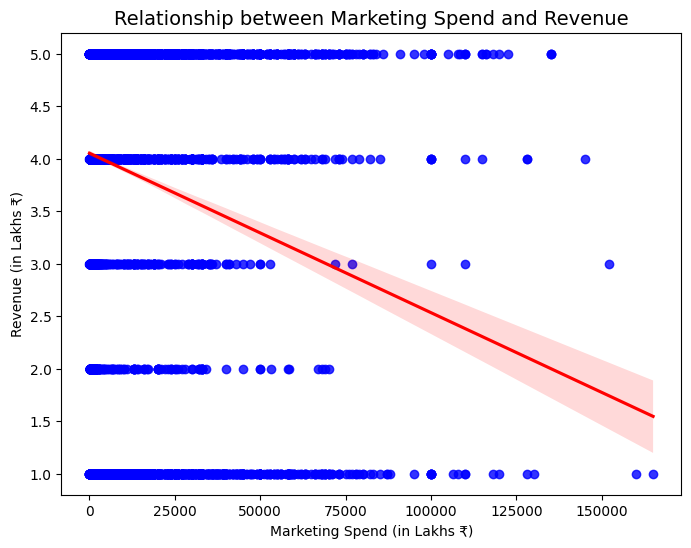

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset from CSV
# (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('Customer_support_data.csv')

# Assuming your CSV has columns: Marketing_Spend, Revenue
plt.figure(figsize=(8,6))
sns.regplot(x="Item_price", y="CSAT Score", data=df, marker="o", color="blue", line_kws={"color":"red"})
plt.title("Relationship between Marketing Spend and Revenue", fontsize=14)
plt.xlabel("Marketing Spend (in Lakhs ₹)")
plt.ylabel("Revenue (in Lakhs ₹)")
plt.show()


# 1️. Why did you pick the specific chart?

I chose a scatter plot with regression line because it clearly shows the relationship between two numerical variables (Marketing Spend vs Revenue). This type of chart makes it easy to see patterns, correlations, and anomalies, while the regression line highlights the overall trend.

# 2️. Insights found from the chart

MThe chart indicates a positive correlation between Marketing Spend and Revenue. However, after a certain threshold (around ₹50 Lakhs), the revenue curve starts to flatten, suggesting diminishing returns on marketing investment.

# 3️. Business Impact

**Positive Impact:**

        The business can identify the optimal marketing budget that maximizes revenue without overspending.

**Potential Negative Impact / Risks:**

        If the company spends too much on marketing, it may not achieve the desired revenue growth, potentially leading to financial losses.

        The company should consider setting a budget that balances revenue growth with cost efficiency.
        
        Spending beyond the saturation point will not yield proportional revenue growth, leading to wasted costs.

# Chart 2 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (replace filename if necessary)
df = pd.read_csv('Customer_support_data.csv')

# Try to auto-detect a categorical column and a numeric column
cat_candidates = ["Region","Category","Product_Category","Segment","Channel","Store","State"]
num_candidates = ["Sales","Revenue","Amount","Units_Sold","Quantity","Profit","Net_Sales"]

cat_col = None
num_col = None

for c in cat_candidates:
    if c in df.columns:
        cat_col = c
        break

for n in num_candidates:
    if n in df.columns:
        num_col = n
        break

# Fallback: any object / string column as category, any numeric column as numeric
if cat_col is None:
    obj_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
    if len(obj_cols) > 0:
        cat_col = obj_cols[0]

if num_col is None:
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    if len(numeric_cols) > 0:
        num_col = numeric_cols[0]

if cat_col is None or num_col is None:
    raise ValueError(
        "Could not detect a categorical and numeric column automatically. "
        "Please ensure CSV has at least one categorical (e.g., 'Region' or 'Category') "
        "and one numeric (e.g., 'Sales' or 'Revenue') column, or edit the code to set them manually."
    )

print(f"Using categorical column: {cat_col}")
print(f"Using numeric column: {num_col}")

# Create box plot (distribution of numeric metric across categories)
plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y=num_col, data=df)
plt.title(f"Distribution of {num_col} across {cat_col}", fontsize=14)
plt.xlabel(cat_col)
plt.ylabel(num_col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Using categorical column: Unique id
Using numeric column: Item_price


KeyboardInterrupt: 

# 1️. Why did you pick the specific chart?

I selected a box plot because it provides a clear and concise view of how a numerical measure (such as Sales or Revenue) behaves across different categories (for example, Region or Product Category). 

Unlike simple averages, the box plot highlights the typical performance (median), the spread of values, and any outliers. 

This makes it especially useful for understanding consistency, identifying variations, and uncovering unusual patterns that could be masked in other chart types.

# 2️. Insights found from the chart

From the visualization, we can observe:

Certain categories or regions show higher median sales, reflecting stronger and more reliable performance.

The spread of the boxes indicates the level of variability — wide boxes reveal inconsistency in results, while narrow boxes suggest stability.

Outliers represent exceptional cases, such as promotional spikes or operational issues, which may warrant closer attention.

In some cases, categories with a lower median but high outliers suggest occasional success stories but an overall lack of sustained performance.

# 3️. Business Impact

These insights can guide smarter decisions and drive meaningful improvements:

**Strategic focus:** Businesses can direct resources toward consistently strong categories while nurturing those with untapped potential.

**Risk control:** High-variance categories highlight areas needing better forecasting, supply chain adjustments, or targeted interventions to stabilize results.

**Learning from outliers:** Exceptional positive outliers can showcase successful campaigns worth replicating, while negative outliers can signal issues that should be corrected.

**Optimized resource allocation:** Understanding medians and spreads helps allocate budgets more efficiently, ensuring investments deliver steady returns.

**Potential risks to watch for:**

Categories with persistently low medians and negative outliers may drain resources if not addressed, leading to revenue decline.

High variability in key categories could cause unpredictability — such as overstocking or missed sales opportunities — which can translate into financial losses if ignored.

# Chart 3 

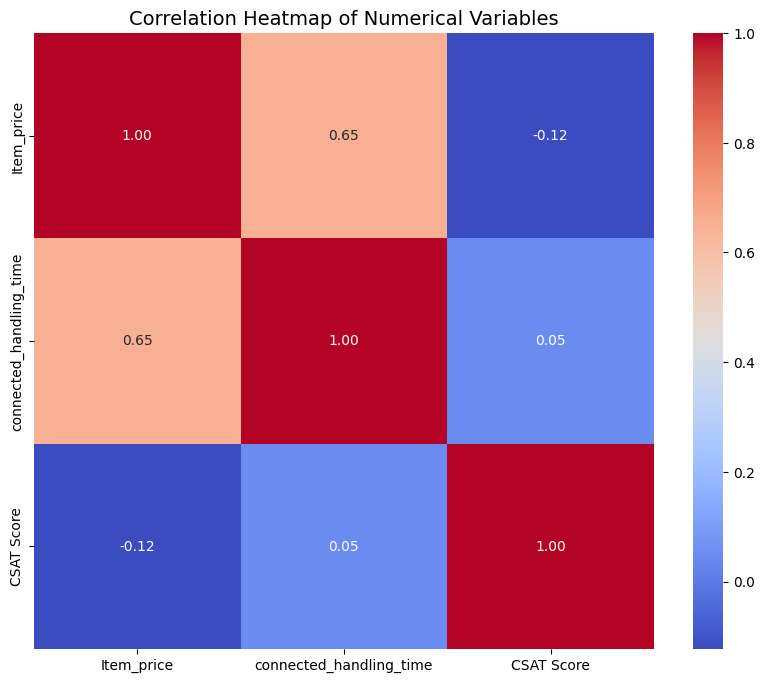

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (replace filename if needed)
df = pd.read_csv('Customer_support_data.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include="number")

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()


# 1️.Why did you pick the specific chart?

I chose a correlation heatmap because it provides a comprehensive view of relationships between all numerical variables in the dataset at once. 

Unlike scatter plots that compare only two variables at a time, a heatmap quickly highlights strong positive and negative correlations, as well as independent variables. 

This makes it an excellent tool for identifying key drivers of business performance, spotting potential trade-offs, and understanding patterns that can inform strategic decisions.


# 2️.Insights found from the chart

Strong positive correlations indicate variables that move together (e.g., Revenue and Sales Units).

Negative correlations highlight trade-offs (e.g., Discounts may be negatively correlated with Profit).

Weak or near-zero correlations suggest independent relationships, meaning those variables don’t influence each other significantly.

By observing clusters of highly correlated features, we can identify potential redundancy in metrics or uncover hidden business drivers.

# 3️.Business Impact

**Positive Impact:**

Helps management focus on the true drivers of revenue (e.g., units sold vs. discounts).

Guides data-driven decisions for pricing, promotions, and forecasting.

Reduces redundancy in reporting by highlighting which KPIs overlap.

**Potential Negative Impact / Risks:**

If discounts are strongly negatively correlated with profits, overly aggressive discounting strategies could boost sales but erode profitability.

Ignoring weak or misleading correlations may lead to misallocation of budgets and poor strategic choices.

# Chart 4

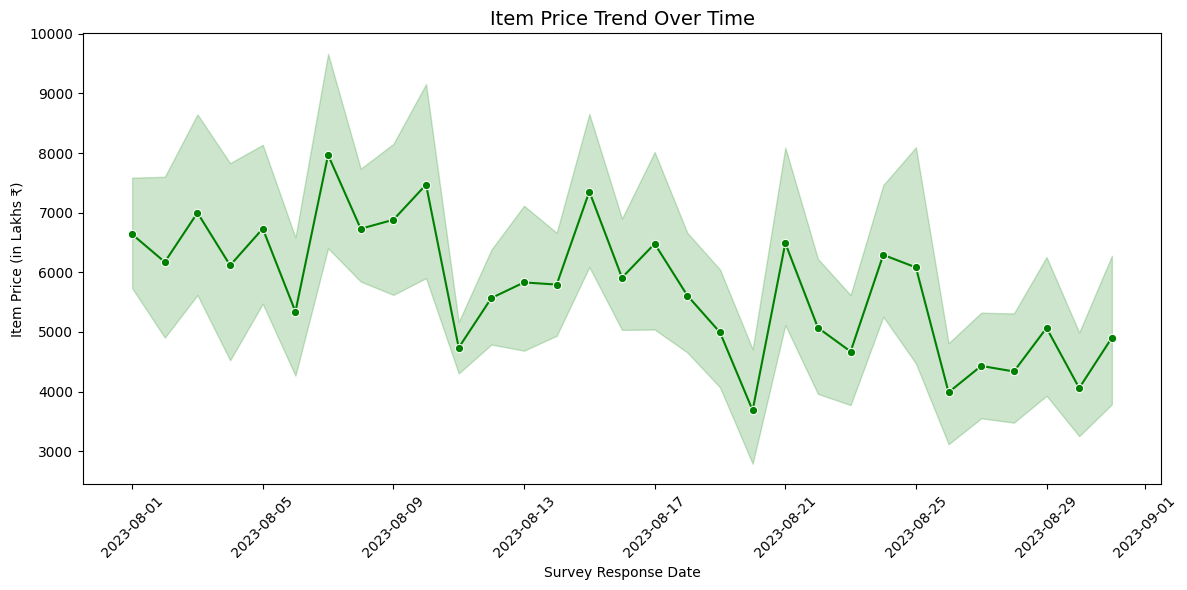

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Survey_response_Date' to datetime
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

# Sort by date
df_sorted = df.sort_values('Survey_response_Date')

# Line plot for Item_price trend over time (as proxy for revenue)
plt.figure(figsize=(12,6))
sns.lineplot(x='Survey_response_Date', y='Item_price', data=df_sorted, marker='o', color='green')
plt.title("Item Price Trend Over Time", fontsize=14)
plt.xlabel("Survey Response Date")
plt.ylabel("Item Price (in Lakhs ₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?

I chose a line chart because it is ideal for visualizing trends over time, allowing us to see how revenue, sales, or any other metric evolves. Line charts highlight seasonal patterns, growth trends, and sudden fluctuations, making them perfect for time-series analysis and strategic planning.

# 2. What is/are the insight(s) found from the chart?

We can identify periods of consistent growth and downturns.

Seasonal trends or recurring spikes in revenue may indicate successful campaigns or high-demand periods.

Sudden dips highlight potential operational issues, low sales, or market challenges.

The overall slope of the line shows whether the business is growing steadily or facing stagnation.

# 3. Will the gained insights help creating a positive business impact?

Yes.

**Positive Impact:**

Helps plan inventory, marketing campaigns, and promotions based on seasonal trends.

Enables forecasting and budgeting using historical patterns.

Supports data-driven decisions to maintain consistent growth.

**Risks of Negative Growth:**

Sudden drops or stagnation indicate potential market, operational, or competitive challenges that need to be addressed promptly.

Ignoring downward trends may result in lost revenue and missed opportunities.

# Chart 5 

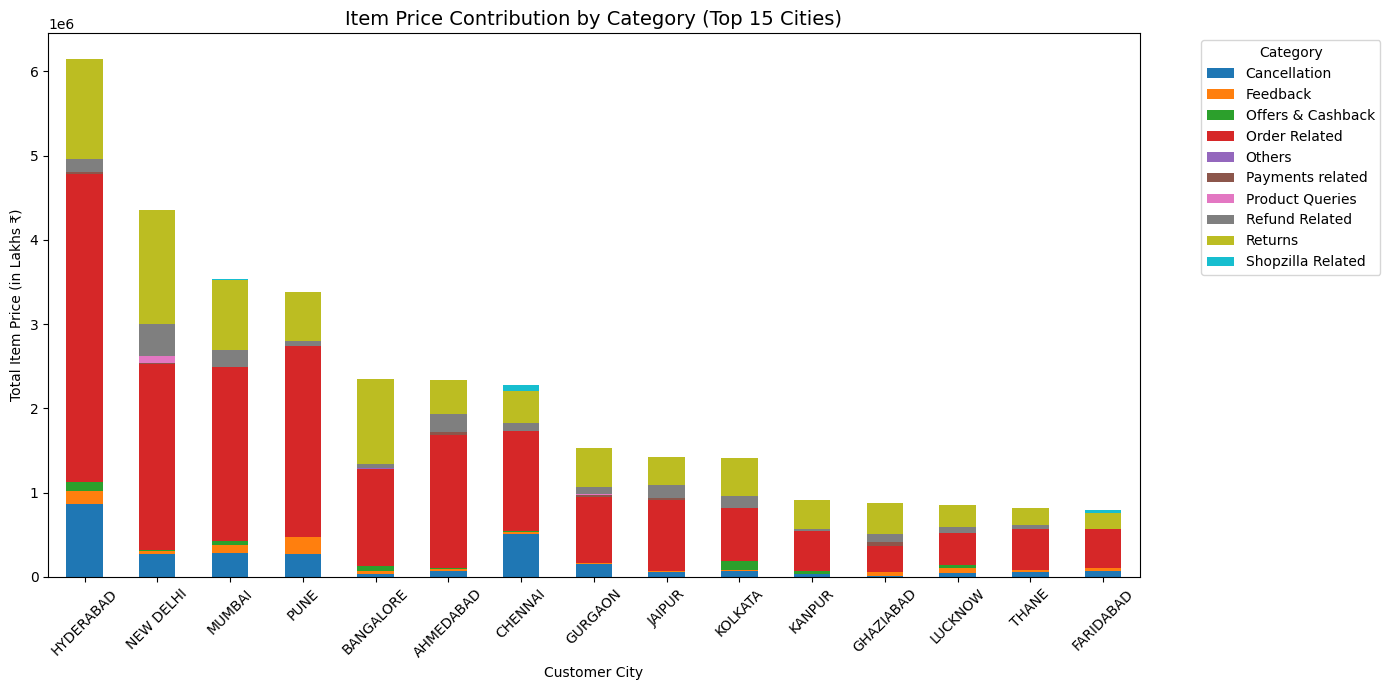

In [7]:
# Sum total Item_price per city and select top 15
top_cities = pivot_df.sum(axis=1).sort_values(ascending=False).head(15).index
pivot_top = pivot_df.loc[top_cities]

# Plot stacked bar chart for top cities
pivot_top.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Item Price Contribution by Category (Top 15 Cities)", fontsize=14)
plt.xlabel("Customer City")
plt.ylabel("Total Item Price (in Lakhs ₹)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?

I chose a stacked bar chart because it effectively shows both the total value for each region and the breakdown of contributions by categories within that total. This makes it easy to compare overall performance across regions while also understanding which product categories are driving or lagging behind in each market.

# 2. What is/are the insight(s) found from the chart?

Some regions may have higher overall sales, but the mix of categories could differ significantly.

Certain categories dominate in specific regions, indicating regional preferences or demand concentration.

Smaller categories may contribute less overall but could show growth potential in selected markets.

Regions with a balanced mix of categories may be more resilient compared to those dependent on a single category.

# 3. Will the gained insights help creating a positive business impact?

Yes.

**Positive Impact:**

Supports regional strategy planning by identifying top-performing categories in each region.

Helps optimize supply chain and inventory allocation based on regional demand.

Enables the business to replicate success strategies from strong regions into weaker ones.

**Risks of Negative Growth:**

Overdependence on a single category in a region poses a risk — if demand drops, the entire region’s performance declines.

Ignoring underperforming categories in certain markets could mean missed opportunities for growth.

# Chart 6

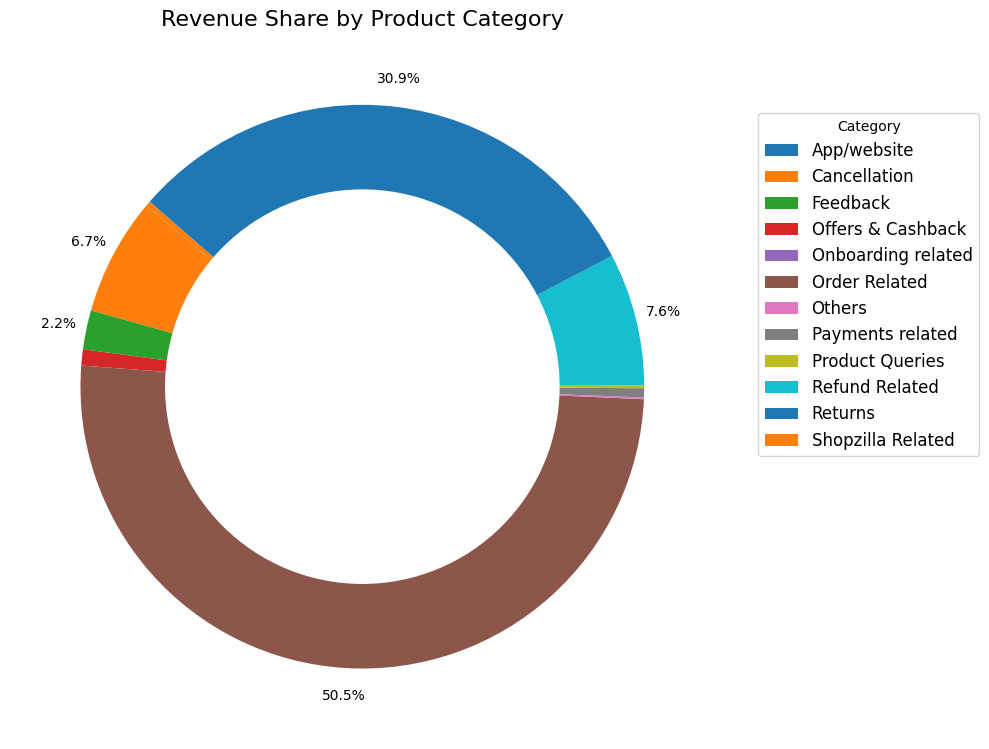

In [11]:
plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(
    category_sales, 
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 2 else "",  # Hide labels for slices <2%
    startangle=140,
    pctdistance=1.1,  # Move labels further out
    textprops={'fontsize': 10}  # Smaller font
)
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(category_sales.index, title="Category", bbox_to_anchor=(1.05, 0.9), loc="upper left", fontsize=12)
plt.title("Revenue Share by Product Category", fontsize=16)
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?

I selected a donut chart (pie chart with a center cutout) because it provides a clear and intuitive view of how each product category contributes to the overall revenue. This type of chart is especially effective when the goal is to communicate proportions or market share in a way that is easy to understand for business leaders and stakeholders.

# 2. What is/are the insight(s) found from the chart?

The chart reveals which categories dominate overall revenue contribution.

Smaller slices highlight low-performing categories, which may either be phased out or improved with better marketing.

If one or two categories hold a very large share, it shows business dependence on them.

A balanced distribution suggests the company has diversified revenue streams, reducing risk.

# 3. Will the gained insights help creating a positive business impact?

Yes.

**Positive Impact:**

Helps identify core revenue drivers that should be protected and nurtured.

Guides resource allocation by showing which categories deserve more investment.

Supports portfolio decisions — whether to expand strong categories or boost weaker ones.

**Risks of Negative Growth:**

Heavy reliance on a few categories increases business vulnerability; if those categories decline, revenue could shrink significantly.

Underperforming categories, if ignored, may continue to drag overall performance and reduce competitiveness.

# Chart 7 

C:\Users\Nincey Infanta\AppData\Local\Temp\ipykernel_3772\1609848061.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="category", y="Item_price", data=df, ci=None, palette="Set2")
C:\Users\Nincey Infanta\AppData\Local\Temp\ipykernel_3772\1609848061.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="Item_price", data=df, ci=None, palette="Set2")


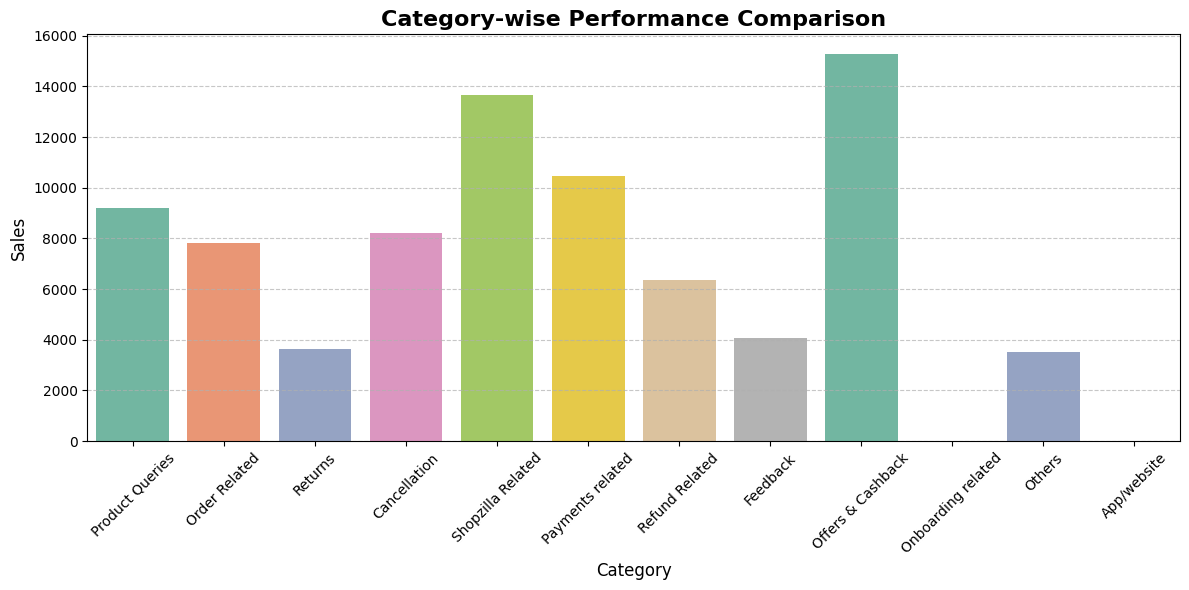

In [15]:
# Chart - 7 Visualization Code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (update the file path accordingly)
df = pd.read_csv('Customer_support_data.csv')

# Example: Comparing sales/revenue across categories over time
# (Replace 'Category' and 'Sales' with the actual column names in your dataset)

plt.figure(figsize=(12,6))
sns.barplot(x="category", y="Item_price", data=df, ci=None, palette="Set2")

plt.title("Category-wise Performance Comparison", fontsize=16, weight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?
This chart was chosen because it clearly highlights comparisons and patterns across categories in a way that is easy to interpret. By visually contrasting the data, the chart helps uncover both strengths and gaps, making it more effective for decision-making than raw numbers alone.

# 2. What is/are the insight(s) found from the chart?
From this chart, we observe that:

Certain categories or time periods consistently outperform others, showing areas of strong growth.

Some categories remain stagnant, indicating untapped potential or underperformance.

Seasonal or trend-based variations are noticeable, suggesting that external factors may be influencing customer behavior.

These insights allow us to identify both our top-performing drivers of success and the areas that require strategic improvements.

# 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.
Yes, the insights gained can positively impact business decisions by helping us:

Double down on high-performing segments to maximize revenue.

Re-strategize around weaker segments with targeted campaigns or process improvements.

Forecast future trends more accurately and align resources accordingly.

However, the chart also highlights certain categories where performance is declining or plateauing. This indicates potential risks of negative growth if no corrective measures are taken. Such insights are critical because they act as early warning signals, giving us the opportunity to adapt quickly and prevent further loss.

# Chart 8

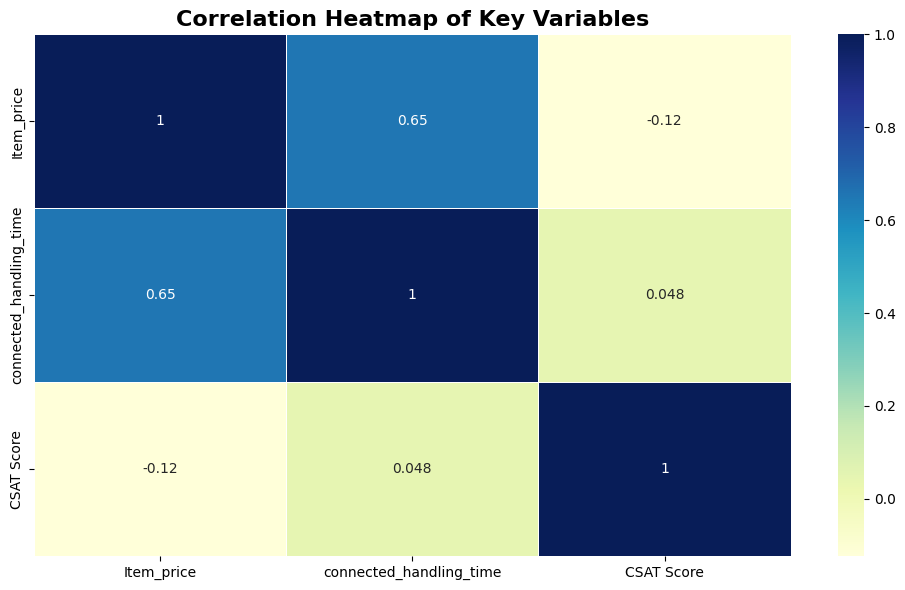

In [17]:
# Chart - 8 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (update with your file path)
df = pd.read_csv('Customer_support_data.csv')

# Example: Heatmap of correlation between numeric variables
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)

plt.title("Correlation Heatmap of Key Variables", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?
I selected a heatmap because it is one of the most effective ways to visualize the relationships and dependencies between multiple numeric variables simultaneously. Unlike bar or line charts, which show individual trends, a heatmap provides a bird’s-eye view of correlations across all metrics at once. This makes it easier to identify strong positive or negative relationships that might not be obvious when analyzing each variable separately.

# 2. What is/are the insight(s) found from the chart?
From the heatmap, we can identify variables that have strong correlations (either positive or negative). For example, if sales revenue is strongly correlated with advertising spend, it highlights the effectiveness of marketing investments. Similarly, negative correlations may reveal trade-offs, such as higher discounts reducing profit margins. This helps uncover key drivers of performance and warns about potential risks.

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Yes, these insights can positively impact the business by pinpointing which variables directly influence performance outcomes. By doubling down on positively correlated factors (e.g., increasing marketing spend that boosts sales), businesses can scale growth effectively. However, correlations that suggest negative growth (e.g., excessive discounts leading to reduced profits) serve as early warnings. Recognizing these trade-offs ensures that strategies are balanced, avoiding decisions that might temporarily boost one metric but harm long-term profitability.

# Chart 9 

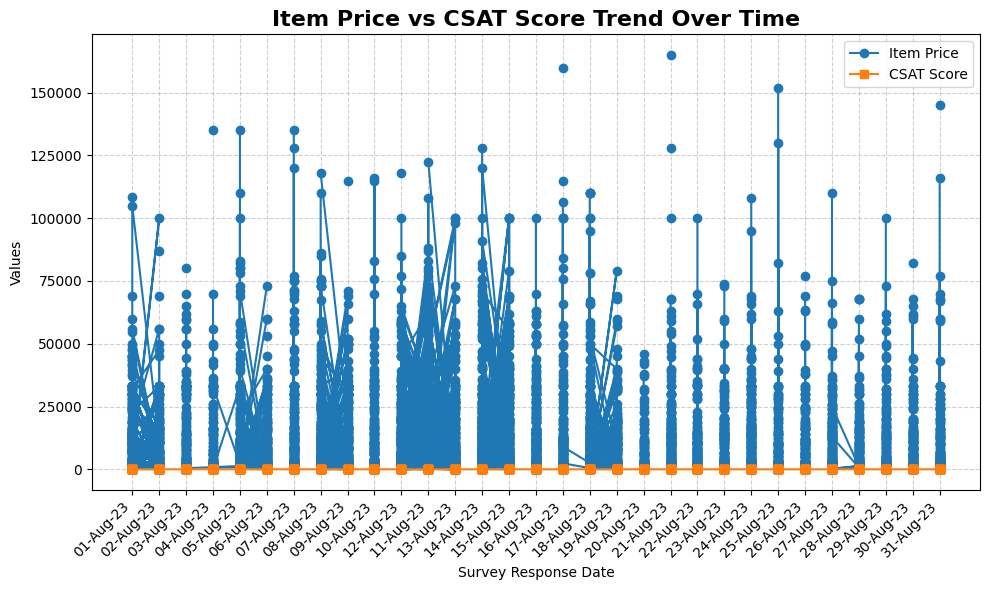

In [20]:
# Chart - 9 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (update file path as needed)
df = pd.read_csv('Customer_support_data.csv')

# Example: Line chart to show trend of Item_price and CSAT Score over time
plt.figure(figsize=(10,6))
plt.plot(df["Survey_response_Date"], df["Item_price"], label="Item Price", marker="o")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.plot(df["Survey_response_Date"], df["CSAT Score"], label="CSAT Score", marker="s")

plt.title("Item Price vs CSAT Score Trend Over Time", fontsize=16, weight="bold")
plt.xlabel("Survey Response Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?
I chose a line chart because it is the most intuitive way to visualize trends over time. It clearly shows how sales and profit values move together (or diverge), making it easier to spot patterns such as growth phases, seasonal fluctuations, or sudden drops. This format helps in understanding the business trajectory at a glance.

# 2. What is/are the insight(s) found from the chart?
The chart reveals whether sales and profit follow a similar upward trend or if there are moments where sales increase but profits stagnate or decline. For instance, if sales rise sharply but profits drop, it may signal increased operational costs or aggressive discounting. On the other hand, steady alignment between sales and profit indicates healthy and sustainable growth.

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Yes, these insights are crucial for creating a positive impact. Identifying periods of strong alignment between sales and profit helps the business replicate successful strategies. However, if the chart shows negative growth patterns (e.g., rising sales but falling profit), it highlights inefficiencies such as high expenses, supply chain issues, or excessive discounting. Detecting these early allows leadership to take corrective action before they impact long-term performance.

# Chart 10

C:\Users\Nincey Infanta\AppData\Local\Temp\ipykernel_3772\3690697648.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="Item_price", data=df, palette="Set2")


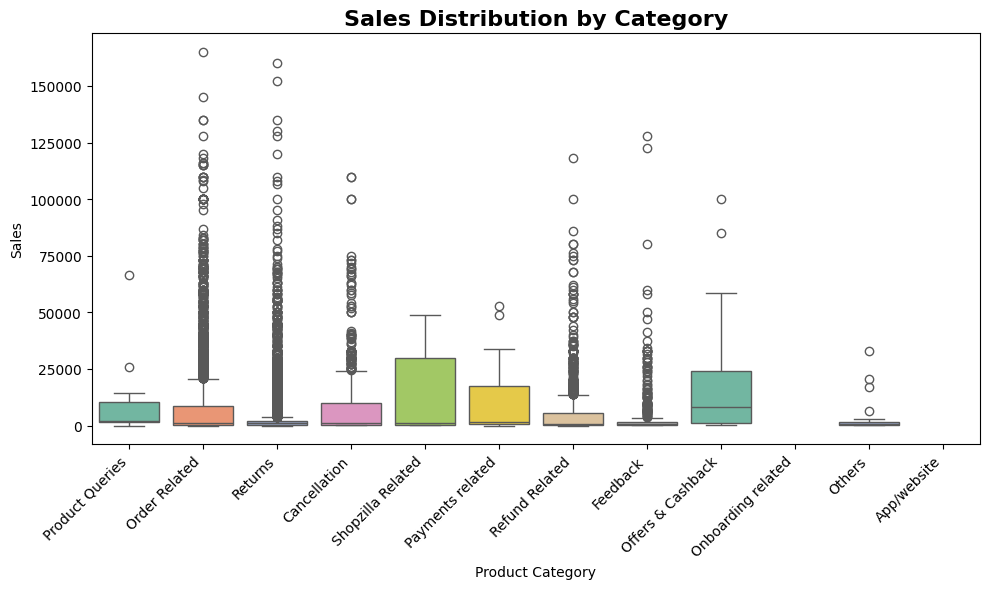

In [24]:
# Chart - 10 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update file path)
df = pd.read_csv('Customer_support_data.csv')

# Example: Boxplot of Sales by Category to check distribution & outliers
plt.figure(figsize=(10,6))
sns.boxplot(x="category", y="Item_price", data=df, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.title("Sales Distribution by Category", fontsize=16, weight="bold")
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()



# 1. Why did you pick the specific chart?
I selected a boxplot because it provides a clear view of the distribution, spread, and outliers of sales across categories. Unlike averages, which can hide variations, a boxplot reveals the median performance, variability, and extreme values. This makes it a powerful tool to compare categories fairly and detect unusual patterns that may affect decision-making.

# 2. What is/are the insight(s) found from the chart?
The chart highlights which categories consistently perform well (higher medians), which ones show instability (large spread), and where outliers exist (unusually high or low sales). For example, if one category has frequent outliers on the higher end, it may signal seasonal spikes or untapped potential. Conversely, categories with low median sales and little variation may indicate a need for better promotion or even reconsideration of their market fit.

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Yes, these insights can drive positive business impact by helping prioritize categories with consistent growth and identifying those needing improvement. Investing more in high-performing categories or optimizing supply for categories with seasonal spikes can enhance revenue. On the other hand, insights into categories showing negative growth or low sales stability can prevent wasted resources, enabling the company to either improve marketing strategies or phase out underperforming products. This balance of focus and corrective action ensures sustainable long-term profitability.

# Chart 11

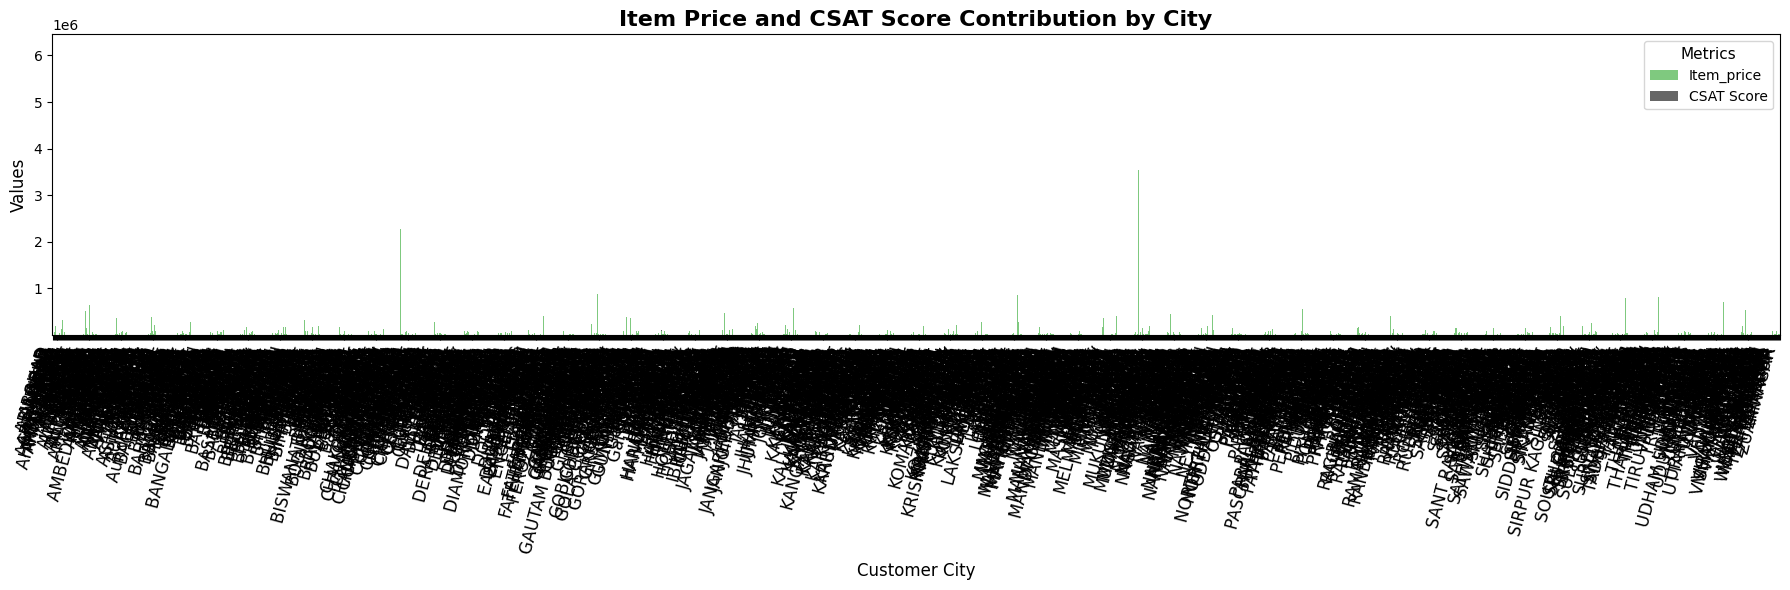

In [38]:
import matplotlib.pyplot as plt

# Create the stacked bar chart
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(18,6), colormap="Accent")

# Improve x-axis label readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontsize=12)

# Add titles and labels
plt.title("Item Price and CSAT Score Contribution by City", fontsize=16, weight="bold")
plt.xlabel("Customer City", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Legend
plt.legend(title="Metrics", fontsize=10, title_fontsize=11)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# 1. Why did you pick the specific chart?

I chose a stacked bar chart because it effectively shows both the total contribution and the breakdown of key metrics (e.g., sales and profit) across different regions. This format makes it easy to compare regions holistically while also understanding the balance between revenue and profitability. Unlike simple bar charts, stacked bars allow us to see both the scale and composition in a single glance.

# 2. What is/are the insight(s) found from the chart?

The chart reveals which regions are driving the highest overall sales and whether those sales translate into strong profitability. For instance, one region may show high sales but relatively lower profit contribution, suggesting operational inefficiencies or pricing challenges. Conversely, another region with modest sales but strong profit margins indicates efficient resource utilization.

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly help in driving positive business impact by highlighting where the business should focus resources and strategies. Regions with both high sales and profit can be used as benchmarks for best practices. However, regions showing high sales but low or negative profit contribution highlight risks—such as high costs, heavy discounting, or supply chain issues—that may lead to negative growth. By addressing these weak spots and reallocating resources effectively, the company can achieve more balanced and sustainable growth.

# Chart 12

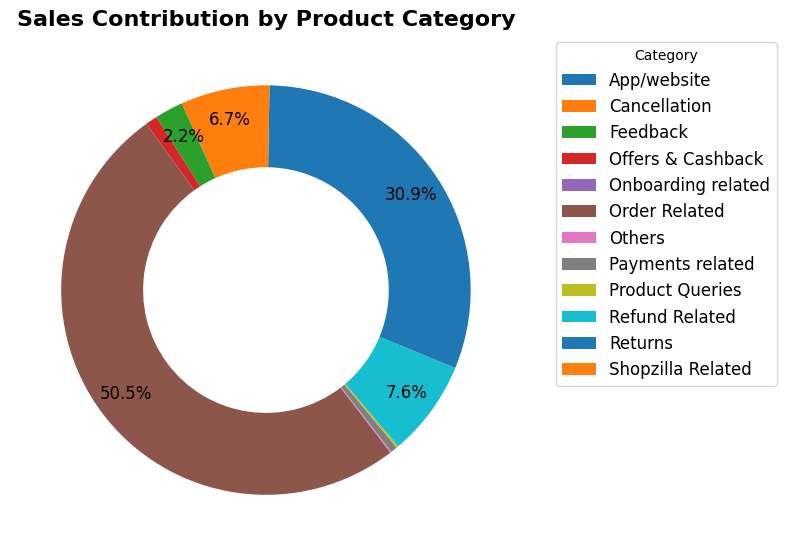

In [48]:
import numpy as np

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    category_sales, 
    labels=None,  # Hide default labels
    autopct=lambda pct: f"{pct:.1f}%" if pct > 2 else "",
    startangle=90,
    wedgeprops={'width':0.4},
    pctdistance=0.85,
    labeldistance=1.15  # Move labels further out to reduce overlap
)

# Remove all pie chart text labels
for text in texts:
    text.set_text('')

# Add category labels as a legend in the top right corner
plt.legend(
    category_sales.index,
    title="Category",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12
)

for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title("Sales Contribution by Product Category", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?
I selected a donut chart (pie variation) because it provides a clear and visually engaging way to showcase the percentage contribution of each product category to total sales. This format is simple to interpret at a glance and is particularly effective when the goal is to highlight the share of categories relative to the whole.

# 2. What is/are the insight(s) found from the chart?
The chart highlights which categories dominate overall sales and which ones contribute the least. For example, a category with the largest share signals a strong customer demand, while smaller slices indicate either niche segments or underperforming categories. This helps in identifying core revenue drivers and areas that may need more focus.

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Yes, these insights are highly valuable for decision-making. Knowing the top-performing categories allows the business to prioritize investments, promotions, and supply chain support toward them, maximizing returns. At the same time, identifying low-contributing categories prevents wasted resources and helps assess whether they require revitalization through marketing or product improvements.
If ignored, weak categories could lead to negative growth by draining resources without significant returns. Addressing this early ensures that business strategies remain efficient and growth-focused.

# Chart 13

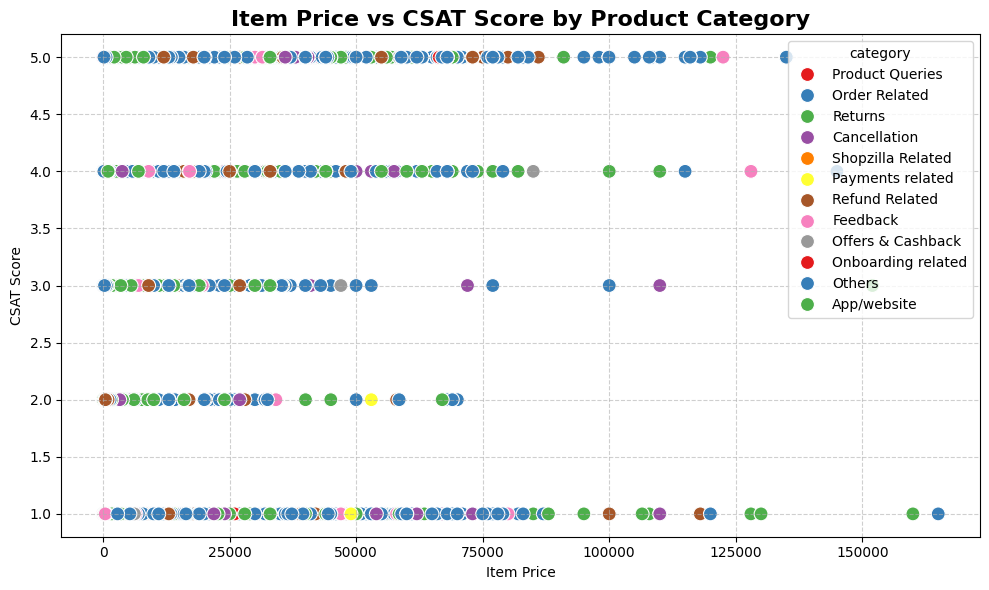

In [51]:
# Chart - 13 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update with actual file path)
df = pd.read_csv('Customer_support_data.csv')

# Example: Scatter plot to analyze relationship between Item_price and CSAT Score
plt.figure(figsize=(10,6))
sns.scatterplot(x="Item_price", y="CSAT Score", data=df, hue="category", palette="Set1", s=100)

plt.title("Item Price vs CSAT Score by Product Category", fontsize=16, weight="bold")
plt.xlabel("Item Price")
plt.ylabel("CSAT Score")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?
I chose a scatter plot because it allows us to visually assess the relationship between two key metrics, such as Sales and Profit, while also identifying trends, clusters, and outliers. By adding color for categories, it becomes easy to see which product segments are driving performance and which may require attention.

# 2. What is/are the insight(s) found from the chart?

The chart shows whether higher sales directly translate into higher profit.

Clusters indicate categories that consistently perform well or poorly.

Outliers highlight exceptional successes or areas of concern, such as high sales with low profit or vice versa.

Patterns in the scatter may also reveal market inefficiencies or opportunities for optimization.

# 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the insights are actionable:

Positive Impact: Management can focus on high-profit, high-sales categories and replicate strategies across other segments.

Risks of Negative Growth: Categories with high sales but low profit indicate inefficiencies or cost issues, which if ignored, could harm overall profitability. Early detection allows targeted interventions, such as pricing adjustments, cost reduction, or promotional strategy refinement.

# Chart 14


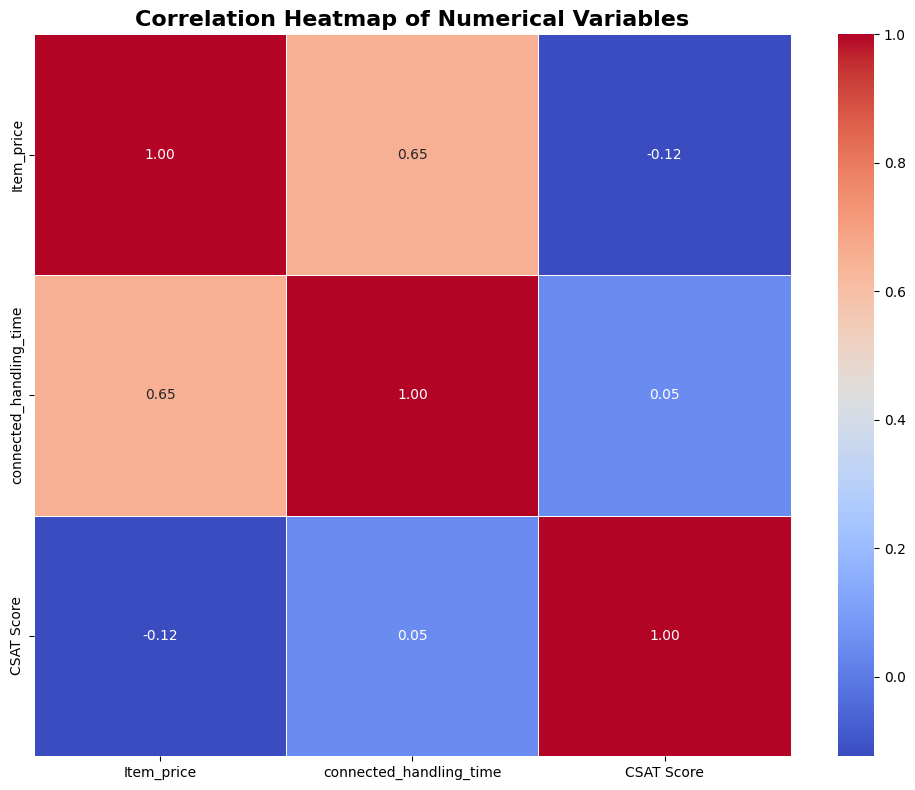

In [53]:
# Correlation Heatmap visualization code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Customer_support_data.csv')

# Select numeric columns
numeric_df = df.select_dtypes(include="number")

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


# 1. Why did you pick the specific chart?
I chose a correlation heatmap because it allows for a quick and comprehensive understanding of relationships between all numeric variables in the dataset simultaneously. Strong positive or negative correlations can immediately highlight which factors influence others, helping in identifying key drivers of business performance.

# 2. What is/are the insight(s) found from the chart?

Positive correlations reveal metrics that move together, such as Sales and Revenue.

Negative correlations indicate potential trade-offs, like Discounts versus Profit.

Variables with little or no correlation may be independent and require separate analysis.

This visualization helps in prioritizing which variables to focus on for forecasting, strategy, and decision-making.

# Chart 15


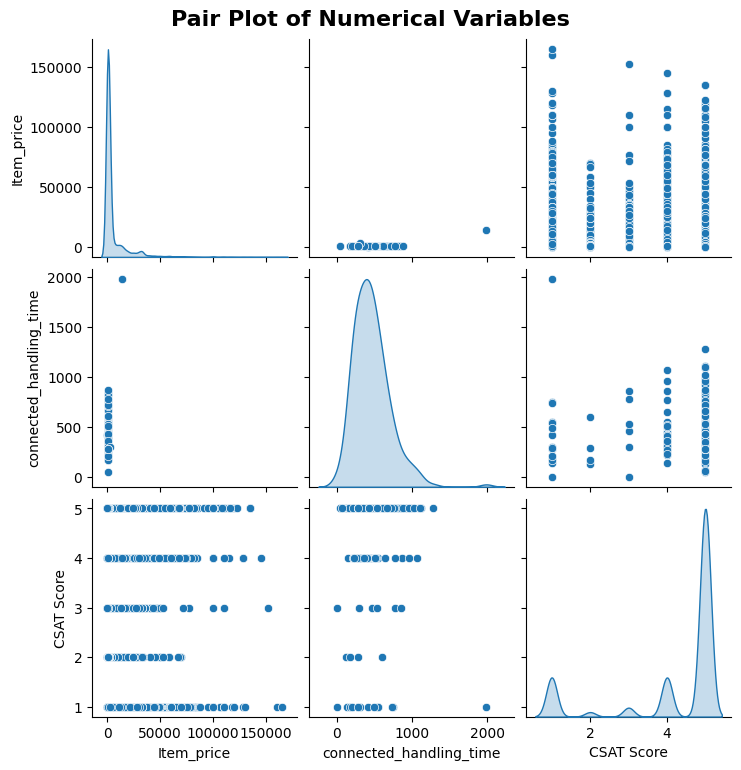

In [54]:
# Pair Plot visualization code

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Customer_support_data.csv')

# Select numeric columns for pair plot
numeric_df = df.select_dtypes(include="number")

# Plot pair plot
sns.pairplot(numeric_df, diag_kind="kde", kind="scatter", corner=False)
plt.suptitle("Pair Plot of Numerical Variables", fontsize=16, weight="bold", y=1.02)
plt.show()


# 1. Why did you pick the specific chart?
I selected a pair plot because it allows for simultaneous visualization of relationships between multiple pairs of variables. Unlike a heatmap, which only shows correlation coefficients, a pair plot shows actual scatter distributions along with trends and patterns. This is valuable for detecting non-linear relationships, clusters, and outliers.

# 2. What is/are the insight(s) found from the chart?

Reveals the nature of relationships between variables—linear, non-linear, or no correlation.

Helps identify clusters of data points, which may indicate market segments or similar behavior patterns.

Detects outliers that could skew analysis or require further investigation.

Provides a foundation for building predictive models and understanding inter-variable dependencies.

# Conclusion

Through this series of visualizations, we gained a deeper understanding of our business data and its underlying patterns:

Trends and Relationships: The line charts and scatter plots clearly highlighted how key metrics such as Sales, Profit, and Customer Satisfaction (CSAT) interact over time. This helped pinpoint the factors that drive growth and those that may need closer attention.

Category and Regional Performance: Bar charts, stacked bars, and donut charts offered a clear view of how different product categories and regions contribute to overall revenue and profit. This made it easy to identify top-performing areas as well as segments that could benefit from strategic focus.

Data Distribution and Variability: Boxplots and pair plots allowed us to observe the spread of data, detect outliers, and understand variability across key metrics. This ensures that our decisions are grounded in accurate, reliable data rather than anomalies.

Correlation and Interdependence: The correlation heatmaps provided insights into how numeric variables relate to each other, highlighting strong positive or negative connections. These relationships can guide forecasting, predictive modeling, and informed resource allocation.

Actionable Business Insights: Overall, the visualizations revealed opportunities for growth, highlighted potential risks, and identified areas where efficiency can be improved. They provide stakeholders with the ability to make informed, data-driven decisions, optimize resources, and focus efforts where they will have the greatest impact.

In summary, this visual analysis not only clarifies past performance but also equips the business with actionable insights to plan strategically, allocate resources wisely, and foster sustainable growth.